# BÀI THỰC HÀNH PHẦN SOFT MARGIN SUPPORT VECTOR MACHINE

## Ví dụ 1

### Cách 1. Tự xây dựng các bước giải bài toán ràng buộc

In [1]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages

means = [[2, 2], [4, 1]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.7, 2]
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

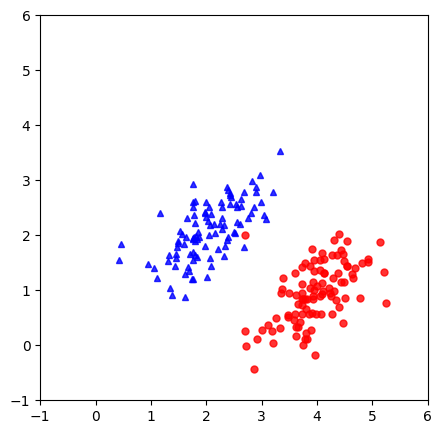

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))  

ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([-1 , 6, -1, 6])
plt.show()

In [3]:
#!pip install cvxopt
from cvxopt import matrix, solvers
C = 100
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))

h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N))) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[8.49521168e-09 2.28019770e-08 5.20318603e-08 1.00362028e-08
  5.72230161e-09 4.03665689e-09 9.49322648e-09 9.66963407e-09
  5.87872821e-09 9.97869323e-09 3.38295949e-08 8.65612107e+01
  8.96678954e-09 3.95233167e-09 5.07686752e-09 3.33356397e-09
  2.81824209e+01 3.70532604e-09 4.21582769e-09 5.90903774e-09
  5.85241969e-09 3.65211347e-09 1.01611034e-08 2.75569113e-08
  3.64212583e-08 4.82977104e-09 4.46937814e-09 5.60793255e-09
  3.86694829e-09 3.69067251e-09 4.24754317e-09 1.27718916e-08
  4.37347243e-09 9.52015181e-09 4.11498756e-09 6.35147917e-09
  1.08517578e-07 3.09524028e-09 2.95135117e-09 1.09162746e-08
  2.07909371e-08 1.06429323e-08 3.91210618e-09 3.57013492e-09
  2.23388200e-08 3.19154757e-08 3.61074960e-09 5.35570952e-09
  3.37238889e-09 4.22246772e-08 1.25193204e-08 6.09783808e-09
  4.12675055e-09 5.30308638e-09 3.20345666e-08 7.32305964e-09
  2.48972727e-08 2.39828854e-08 1.18875284e-08 2.90249843e-08
  4.80431490e-09 9.80642912e-09 2.09423738e-08 1.26320117e-

In [4]:
S = np.where(l > 1e-5)[0] # support set 
S2 = np.where(l < .999*C)[0] 

M = [val for val in S if val in S2] # intersection of two lists

XT = X.T # we need each column to be one data point in this alg
VS = V[:, S]
lS = l[S]
yM = y[:, M]
XM = X[:, M]

w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))
print(w_dual.T, b_dual) 

[[-1.7209464   1.36773208]] 3.1576396277502994


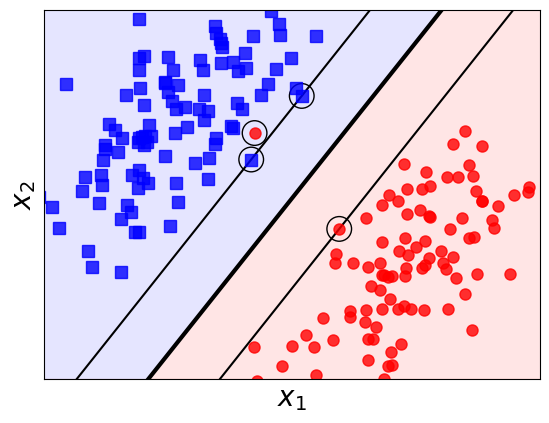

In [5]:
# draw plot points
fig, ax = plt.subplots()

w = w_dual
b = b_dual

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')
y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)

plt.show()

### Bài tập thực hành 1.1

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = np.sign(b + X.T.dot(w.T[0]))

print('Accuracy:', accuracy_score(y.ravel(), y_pred))
print('Confusion matrix:')
print(confusion_matrix(y.ravel(), y_pred))

Accuracy: 0.995
Confusion matrix:
[[ 99   1]
 [  0 100]]


### Cách 2. Xây dựng phương pháp giải bài toán tối ưu không ràng buộc

In [7]:
X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) # extended data 

Z = np.hstack((X0_bar, - X1_bar)) # as in (22)
lam = 1./C

def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
        .5*lam*np.sum(w*w)) - .5*lam*w[-1]*w[-1] # no bias 

def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)
    g[-1] -= lam*w[-1] # no weight decay on bias
    return g

eps = 1e-6
def num_grad(w):
    g = np.zeros_like(w)
    for i in range(len(w)):
        wp = w.copy()
        wm = w.copy()
        wp[i] += eps 
        wm[i] -= eps 
        g[i] = (cost(wp) - cost(wm))/(2*eps)
    return g 

w0 = np.random.randn(X0_bar.shape[0], 1) 
g1 = grad(w0)
g2 = num_grad(w0)
diff = np.linalg.norm(g1 - g2)
print('Gradient different: %f' %diff)

Gradient different: 0.000000


In [8]:
def grad_descent(w0, eta):
    w = w0
    it = 0 
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        if (it % 10000) == 1:
            print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break 
    return w 
w0 = np.random.randn(X0_bar.shape[0], 1) 
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
print(w_hinge.T, b_hinge)

iter 1 cost: 630.160605
iter 10001 cost: 2.291185
iter 20001 cost: 2.289880
iter 30001 cost: 2.283430
iter 40001 cost: 2.279398
iter 50001 cost: 2.275984
iter 60001 cost: 2.284930
iter 70001 cost: 2.272795
iter 80001 cost: 2.272621
iter 90001 cost: 2.272611
[[-1.70197341  1.37483892]] [3.08359187]


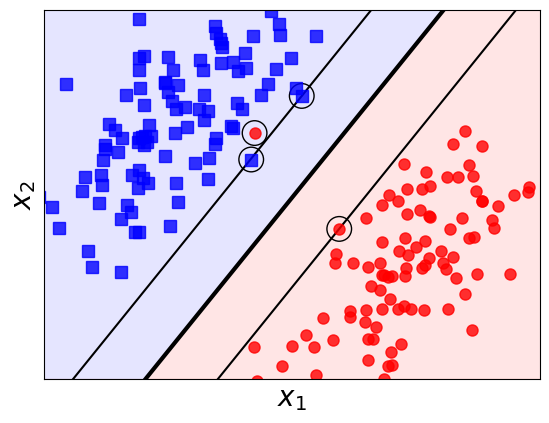

In [9]:
# draw plot points
fig, ax = plt.subplots()

w = w_hinge
b = b_hinge

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')
y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)

plt.show()

### Bài tập thực hành 1.2

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = np.sign(b + X.T.dot(w.T[0]))

print('Accuracy:', accuracy_score(y.ravel(), y_pred))
print('Confusion matrix:')
print(confusion_matrix(y.ravel(), y_pred))

Accuracy: 0.995
Confusion matrix:
[[ 99   1]
 [  0 100]]


### Cách 3. Sử dụng thư viện

In [11]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 100) # use the same C
# if C is small, method will be “SoftMagin SVM”, 
# if C is large enough, method is near to hard margin
clf.fit(X1, y1) 

w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('b = ', w0)

w =  [[-1.7210582   1.36767249]]
b =  [3.15807685]


### Bài tập thực hành 1.3

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X1)

print('Accuracy:', accuracy_score(y.ravel(), y_pred))
print('Confusion matrix:')
print(confusion_matrix(y.ravel(), y_pred))

Accuracy: 0.995
Confusion matrix:
[[ 99   1]
 [  0 100]]


### Bài tập thực hành 2

In [13]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])

print(cancer_data.data.shape)
#target set
print(cancer_data.target)

from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target,
                                                    test_size=0.3,
                                                    random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [14]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 100)
clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9707602339181286
Confusion matrix:
[[ 62   1]
 [  4 104]]


## Ví dụ 2

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('sonar.all-data.csv', header=None)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:60],
                                                    data[60],
                                                    test_size=0.3,
                                                    random_state=42)

In [17]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 100)
clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7142857142857143
Confusion matrix:
[[25 10]
 [ 8 20]]


## Ví dụ 3

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('spambase.data', header=None)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:57],
                                                    data[57],
                                                    test_size=0.3,
                                                    random_state=42)

In [20]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 100)
clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9087617668356264
Confusion matrix:
[[735  69]
 [ 57 520]]
